# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# read in the worldcities data file that "citipy" uses.
# this will provide the easiest way to compare 
# actual coordinates with request coordinates

worldcities_df = pd.read_csv("worldcities.csv")

aa = worldcities_df["City"]
bb = worldcities_df["Country"]
worldcities_df["Place"] = aa + ", " + bb
worldcities_df = worldcities_df.set_index("Place")
worldcities_df.head()



,Country,City,Latitude,Longitude
Place,,,,
"a, no",no,a,63.966667,10.216667
"a coruna, es",es,a coruna,43.366609,-8.406812
"a dos cunhados, pt",pt,a dos cunhados,39.152370,-9.297199
"aabenraa, dk",dk,aabenraa,55.036217,9.417999
"aabybro, dk",dk,aabybro,57.150000,9.750000


## Generate Cities List

In [6]:
# List for holding cities
cities = []
latitudes = []     # temp
longitudes = []    # temp
places = []
cities_found = 0
city_requests = 0
cities_needed = 750    # a good bit larger than actually needed, because some cities may not be found
        
while cities_found < cities_needed:
# randomly generate a lat and long combination
    request_lat  = np.random.uniform(low=-90.000, high=90.000)
    request_long = np.random.uniform(low=-180.000, high=180.000)
    
    actual_lat = 0.000
    actual_long = 0.000

     # Identify nearest city
    city = citipy.nearest_city(request_lat, request_long).city_name
    country = citipy.nearest_city(request_lat, request_long).country_code
    place = city + ", " + country
    city_requests += 1
    
# since there is four times as much area covered by water as by land,
# and since all cities are on land, I believe that a purely random selection of coordinates
# leads to a bias toward coastal cities.  I will attempt to reduce that bias
# by requiring that cities be within one degree of the requested coordinates, long and lat 

    # take the place we found and get its actual coordinates
    actual_lat = worldcities_df.at[place, "Latitude"]
    actual_long = worldcities_df.at[place, "Longitude"]
    
    # it's eligible to be used if within one degree
    eligible = True
    if actual_lat - 1 > request_lat:
        eligible = False
    elif request_lat - 1 > actual_lat:
        eligible = False
    if actual_long - 1 > request_long:
        eligible = False
    elif request_long - 1 > actual_long:
        eligible = False
   
#   activate this statement to test with eligibility condition disabled
#    eligible = True

    if eligible:
    # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
            latitudes.append(actual_lat)      # temp
            longitudes.append(actual_long)    # temp
            places.append(place)
            cities_found += 1

print ("Number of Cities Found:   ", cities_found)
print ("Number of requests made:  ", city_requests)
    
# and then we will add one more
cities.append("bucharest")
# because I don't think we'll be getting a "PyRomania" project

Number of Cities Found:    750
Number of requests made:   4960


Text(0.5, 1.0, 'Cities Found after Discarding Water Coordinates')

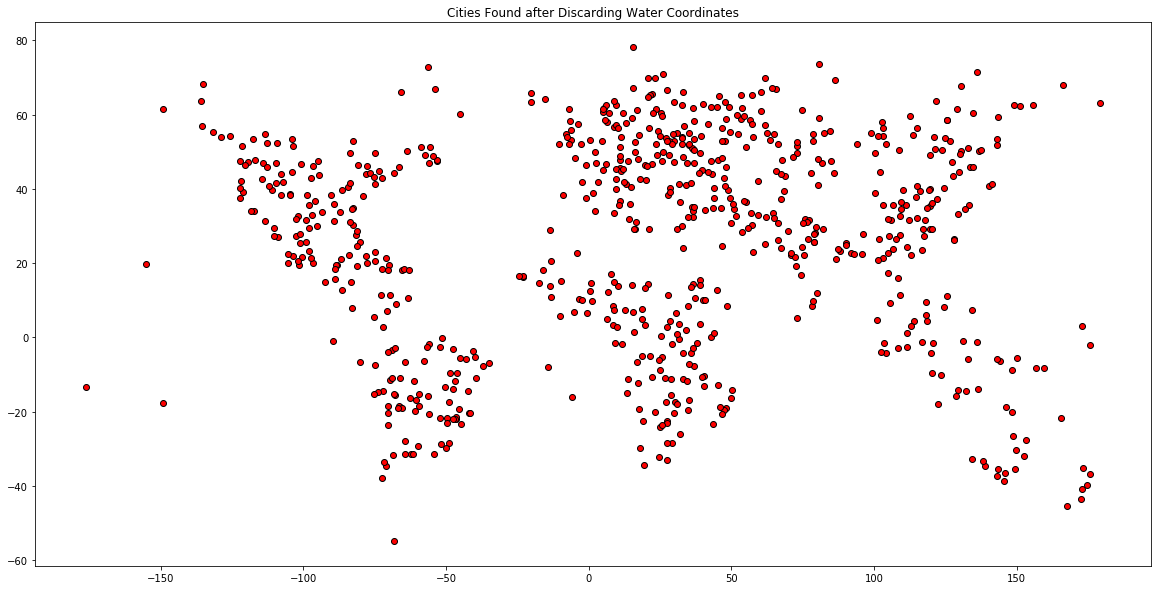

In [7]:
# just to see, let's plot out our cities found after discarding ineligible coordinates

plt.figure(figsize=(20,10))

plt.scatter(longitudes, latitudes, marker="o", facecolors="red", edgecolors="black")
plt.title("Cities Found after Discarding Water Coordinates")
            

Text(0.5, 1.0, 'Cities Found Accepting All Coordinates')

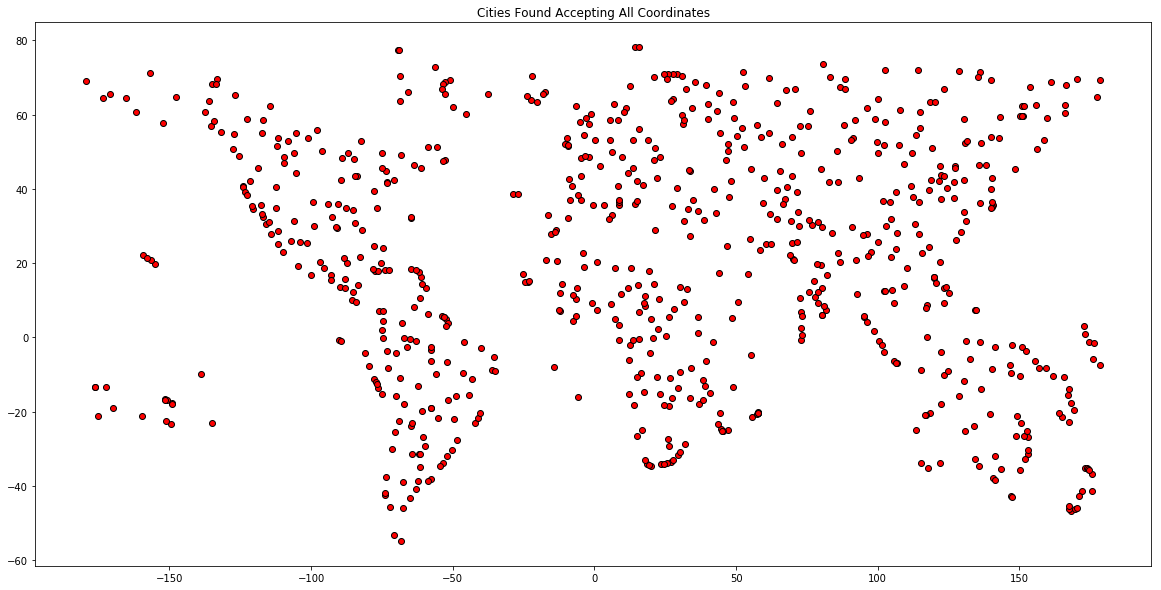

In [4]:
# and for comparison, here's a plot of cities that accepts all random coordinates

plt.figure(figsize=(20,10))

plt.scatter(longitudes, latitudes, marker="o", facecolors="red", edgecolors="black")
plt.title("Cities Found Accepting All Coordinates")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [9]:
unit="imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={unit}&q="
print("------ Processing APIs for Cities ------")
chosencities = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(url + city).json()
        print("Processing:  city #" + str(cities.index(city)) + "  " + city)
        humidvalue = response["main"]["humidity"]
        # some of the cities are severe outliers (e.g. 300%) with regards to humidity
        # we can reject them if we can document them
        if humidvalue > 110:
            print("             city #" + str(cities.index(city)) + 
                  "  " + city + 
                  "   rejected: humidity value too high (" + str(humidvalue) + ")")
        else:    
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            maxtemp.append(response['main']['temp_max'])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            windspeed.append(response["wind"]["speed"])
            chosencities.append(city)
    except Exception as xyz:
        print("             city #" + str(cities.index(city)) + "  " + city + "   Not Found!")

print("------ Processing APIs finished ------")
print("The number of cities chosen is " + str(len(chosencities)))


    






------ Processing APIs for Cities ------
Processing:  city #0  fountain
Processing:  city #1  dien bien
             city #1  dien bien   Not Found!
Processing:  city #2  tomatlan
Processing:  city #3  nyzhni sirohozy
Processing:  city #4  kimbe
Processing:  city #5  narrabri
Processing:  city #6  isiro
Processing:  city #7  bac lieu
             city #7  bac lieu   Not Found!
Processing:  city #8  esil
Processing:  city #9  madimba
Processing:  city #10  dikson
Processing:  city #11  qaracala
Processing:  city #12  taksimo
Processing:  city #13  shahpur
Processing:  city #14  ust-maya
Processing:  city #15  bourges
Processing:  city #16  buala
Processing:  city #17  negrar
Processing:  city #18  bodden town
Processing:  city #19  bose
Processing:  city #20  bastia
Processing:  city #21  santiago del estero
Processing:  city #22  yirol
             city #22  yirol   Not Found!
Processing:  city #23  moyale
Processing:  city #24  colquechaca
Processing:  city #25  grass valley
Processin

Processing:  city #225  barra do corda
Processing:  city #226  alihe
Processing:  city #227  riverside
Processing:  city #228  lins
Processing:  city #229  palafrugell
Processing:  city #230  redwood city
Processing:  city #231  san juan
Processing:  city #232  turan
Processing:  city #233  hovd
Processing:  city #234  ust-uda
Processing:  city #235  havre-saint-pierre
Processing:  city #236  qinhuangdao
Processing:  city #237  sume
Processing:  city #238  capao da canoa
Processing:  city #239  rojhan
Processing:  city #240  sorong
Processing:  city #241  bani walid
Processing:  city #242  mazatan
             city #242  mazatan   Not Found!
Processing:  city #243  ocampo
Processing:  city #244  bolotnoye
Processing:  city #245  ivnya
Processing:  city #246  moth
Processing:  city #247  broome
Processing:  city #248  unity
Processing:  city #249  selizharovo
Processing:  city #250  skagastrond
             city #250  skagastrond   Not Found!
Processing:  city #251  fontenay-le-comte
Pr

Processing:  city #439  honningsvag
Processing:  city #440  kabinda
Processing:  city #441  ijaki
             city #441  ijaki   Not Found!
Processing:  city #442  senador jose porfirio
Processing:  city #443  soria
Processing:  city #444  stettler
Processing:  city #445  reconquista
Processing:  city #446  verkhnyaya inta
Processing:  city #447  bolshoy lug
Processing:  city #448  bandar-e anzali
Processing:  city #449  nipawin
Processing:  city #450  carupano
Processing:  city #451  waingapu
Processing:  city #452  vestmannaeyjar
Processing:  city #453  karauli
Processing:  city #454  amiens
Processing:  city #455  marigot
Processing:  city #456  oum hadjer
Processing:  city #457  liepaja
Processing:  city #458  alta
Processing:  city #459  sao paulo de olivenca
Processing:  city #460  lukashin
Processing:  city #461  great bend
Processing:  city #462  manikchhari
             city #462  manikchhari   Not Found!
Processing:  city #463  gander
Processing:  city #464  mogapinyana
Proc

Processing:  city #658  ayorou
Processing:  city #659  jiangyou
Processing:  city #660  teguise
Processing:  city #661  lanivtsi
Processing:  city #662  palmer
Processing:  city #663  nicolas bravo
Processing:  city #664  pensilvania
Processing:  city #665  novopskov
Processing:  city #666  gayeri
Processing:  city #667  ramos arizpe
Processing:  city #668  athabasca
Processing:  city #669  maun
Processing:  city #670  taldan
Processing:  city #671  gewane
Processing:  city #672  parintins
Processing:  city #673  rognan
Processing:  city #674  ingham
Processing:  city #675  abyek
Processing:  city #676  nanortalik
Processing:  city #677  lafia
Processing:  city #678  suileng
Processing:  city #679  abay
Processing:  city #680  salihorsk
Processing:  city #681  mapiripan
Processing:  city #682  shahrud
Processing:  city #683  taicheng
Processing:  city #684  sabinas
Processing:  city #685  dhamnod
Processing:  city #686  guasdualito
Processing:  city #687  shwebo
Processing:  city #688 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weatherdata_df = pd.DataFrame(
    {"Cities" : chosencities,
     "Latitudes" : lat,
     "Longitudes" : long,
     "Max Temps" : maxtemp,
     "Humidity" : humidity,
     "Cloudiness" : cloudiness,
     "Wind Speed" : windspeed }
)

weatherdata_df.head(20)

,Cities,Latitudes,Longitudes,Max Temps,Humidity,Cloudiness,Wind Speed
0,fountain,38.68,-104.70,53.01,100,75,9.17
1,tomatlan,19.93,-105.25,85.54,45,0,3.62
2,nyzhni sirohozy,46.85,34.38,40.45,63,76,12.91
3,kimbe,-5.56,150.15,78.34,100,36,3.85
4,narrabri,-30.33,149.78,77.00,57,75,12.75
5,isiro,2.77,27.62,84.19,44,12,4.41
6,esil,51.96,66.41,24.61,81,76,2.95
7,madimba,4.42,9.93,84.20,83,75,3.36
8,dikson,73.51,80.55,15.07,91,68,21.52
9,qaracala,39.81,48.95,49.09,91,0,11.01


In [11]:
# export the data to csv
weatherdata_df.to_csv("weatherdata.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

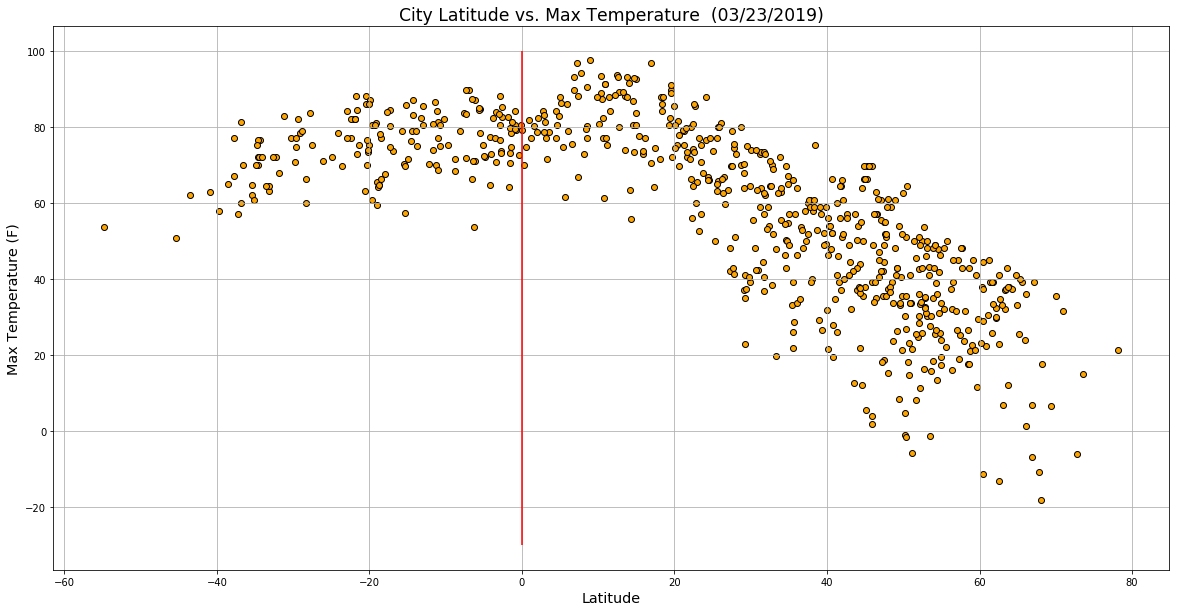

In [12]:
import datetime as dt
date = dt.datetime.today().strftime("%m/%d/%Y")

plt.figure(figsize=(20,10))
plt.scatter(weatherdata_df["Latitudes"], weatherdata_df["Max Temps"], marker="o", facecolors="orange", edgecolors="black")
plt.title("City Latitude vs. Max Temperature  (" + date + ")",fontsize="xx-large")
plt.xlabel("Latitude",fontsize="x-large")
plt.ylabel("Max Temperature (F)",fontsize="x-large")
plt.grid()
plt.vlines(0,-30,100,color="red")    # equator gets special attention
plt.savefig("MaxTemp.png")


#### Latitude vs. Humidity Plot

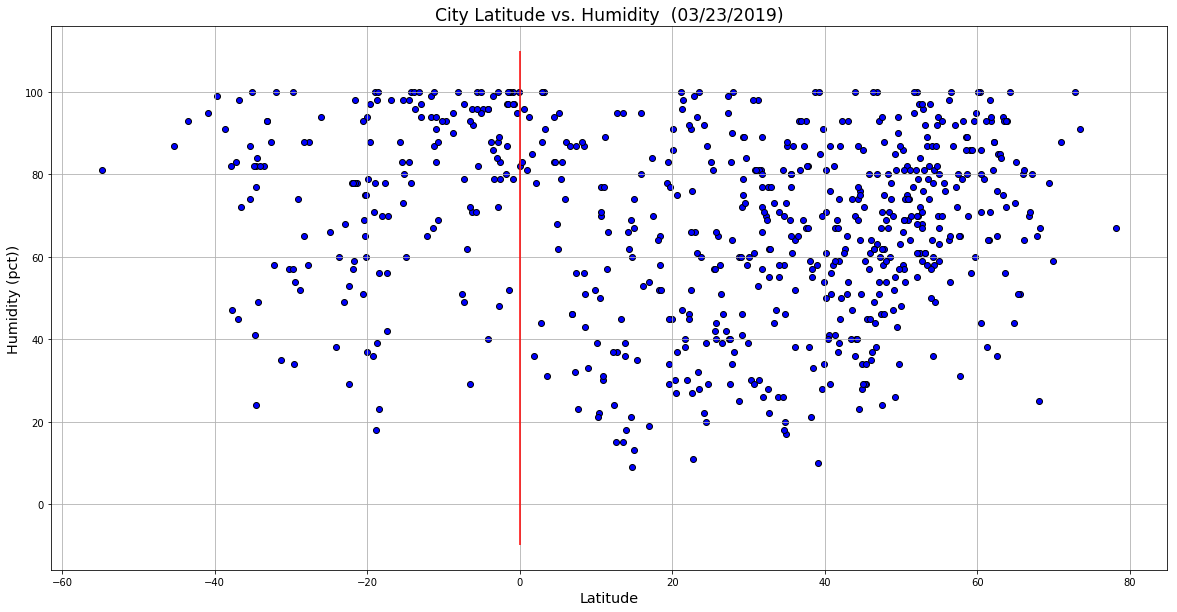

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(weatherdata_df["Latitudes"], weatherdata_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity  (" + date + ")",fontsize="xx-large")
plt.xlabel("Latitude",fontsize="x-large")
plt.ylabel("Humidity (pct))",fontsize="x-large")
plt.grid()
plt.vlines(0,-10,110,color="red")    # equator gets special attention
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

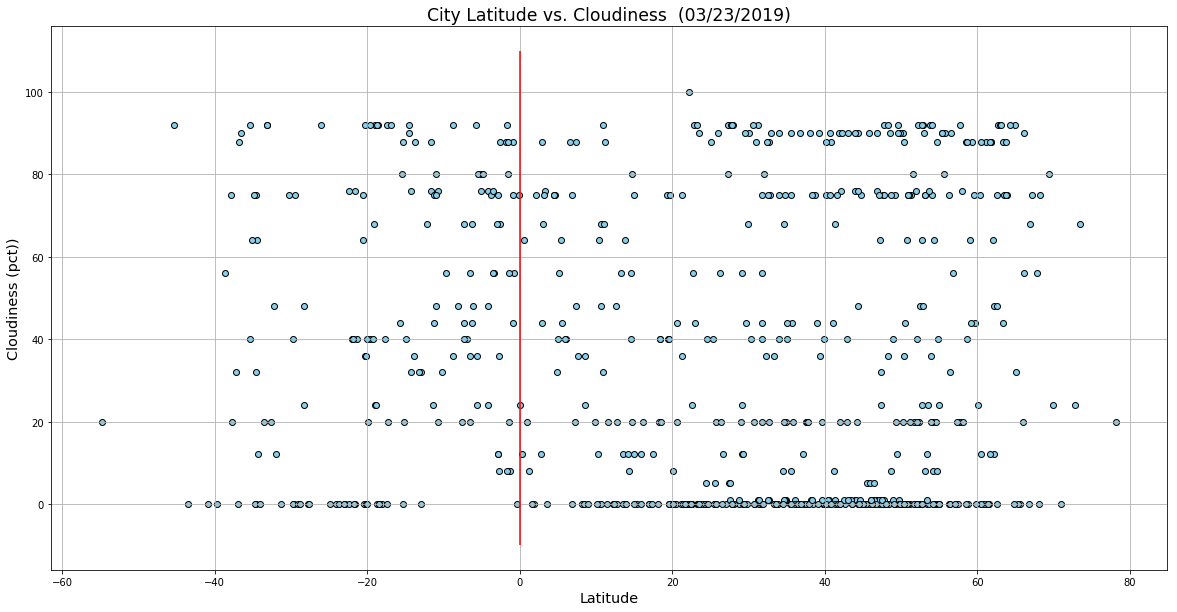

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(weatherdata_df["Latitudes"], weatherdata_df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness  (" + date + ")",fontsize="xx-large")
plt.xlabel("Latitude",fontsize="x-large")
plt.ylabel("Cloudiness (pct))",fontsize="x-large")
plt.grid()
plt.vlines(0,-10,110,color="red")      # equator gets special attention
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

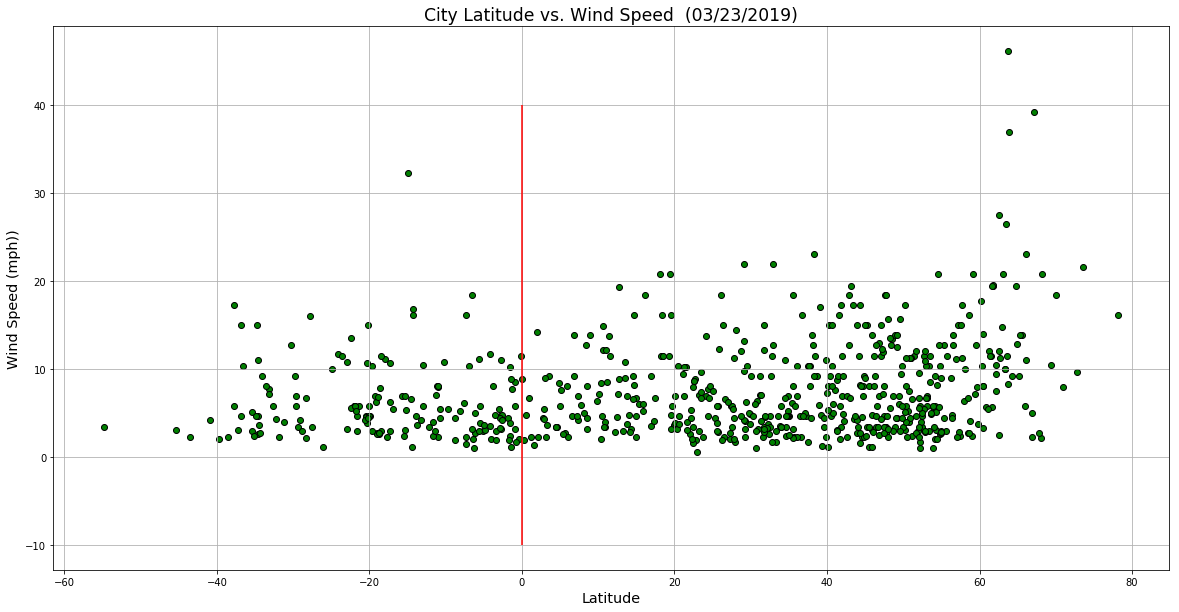

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(weatherdata_df["Latitudes"], weatherdata_df["Wind Speed"], marker="o", facecolors="green", edgecolors="black")
plt.title("City Latitude vs. Wind Speed  (" + date + ")",fontsize="xx-large")
plt.xlabel("Latitude",fontsize="x-large")
plt.ylabel("Wind Speed (mph))",fontsize="x-large")
plt.grid()
plt.vlines(0,-10,40,color="red")       # equator gets... well, you know by now
plt.savefig("WindSpeed.png")

## Analysis

-  The plot shows, generally speaking, that temperatures do get warmer in cities that are closer to the equator.  This time of year, near the date of equinox, there should be a minimum of seasonal effect; this is demonstrated in the chart in that the scatter from -20 to 0 latitude is very similar to that from 0 to 20.  This is not so much the case between the respective 20 to 40 degrees latitude, and it would be interesting to dig deeper to find out why.
-  There is no observable relationship between latitude and humidity.  This would suggest that other, more localized factors are a bigger determinant for humidity.
-  There seems to be no strong relationship between latitude and cloudiness.  It would seem that there are more northerly cities (north of 30) with a greater degree of cloudiness, but it's not clear that it's because there are more northern hemisphere cities in general.
-  There appears to be no strong relationship between latitude and wind speed.  It seems interesting though that there are some far northerly cities with much higher than average wind speeds.

There are many more ways we could show this data.  As an example, we could show the distribution of cities with humidity greater than 80%, to show whether they are clustered together or more disperse.

In [16]:
import gmaps
from config import gkey

gmaps.configure(api_key=gkey)

In [17]:
cloudycities_df = weatherdata_df.loc[weatherdata_df["Cloudiness"] > 80, :]
cclat = cloudycities_df["Latitudes"]
cclong = cloudycities_df["Longitudes"]

coordinates = list(zip(cclat, cclong))


In [18]:
figure_layout = {
    "width" : "100px",
    "height": "100px",
    "border" : "1px solid black",
    "padding" : "1px", 
    "margin" : "0 auto 0 auto"
}
fig = gmaps.figure(layout=figure_layout)

In [19]:
markers = gmaps.marker_layer(coordinates)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='100px', margin='0 auto 0 auto', padding='1px', wi…

In [ ]:
weatherdata_df["Cloudiness"].unique()